# Measuring multiscale curvature and valley with in synthetic landscapes



In [1]:
import sys
sys.path.append('..')
sys.path.append('../TopoAnalysis/')

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.signal import sawtooth

In [4]:
from TopoAnalysis.dem import Elevation, FilledElevation, FlowDirectionD8, Area
from TopoAnalysis.dem import MultiscaleCurvatureValleyWidth as MCVW

In [5]:
dataset = rasterio.open('data/sierras_pras_30m.tif')
default_profile = dataset.profile

In [6]:
def save_synthetic(data, filename, profile=default_profile):
    ny, nx = data.shape
    default_profile.update(count=1, width=nx, height=ny, dtype=np.float64)
    with rasterio.open(filename, 'w', **profile) as dest:
        dest.write(data, 1)

## Triangular landscape

In [7]:
f = 5
t = np.linspace(0, 1, 100)
y = sawtooth(2 * np.pi * f * t, width=0.5)
triangle = np.tile(y, (50, 1))
triangle += 1
save_synthetic(triangle, 'data/triangle.tif')

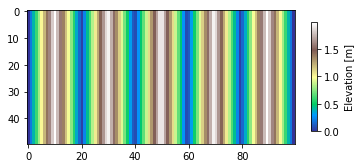

In [8]:
im = plt.imshow(triangle, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

In [11]:
elev = Elevation.load('data/triangle.tif')
filled = FilledElevation(elevation=elev)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

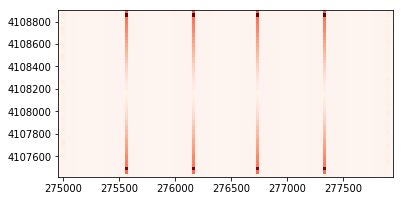

In [12]:
area.plot(cmap='Reds')

## Sinusoidal landscape

In [9]:
f = 5
t = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * f * t)
sinusoid = np.tile(y, (50, 1))
sinusoid += 1
save_synthetic(sinusoid, 'data/sinusoid.tif')

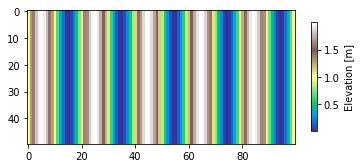

In [10]:
im = plt.imshow(sinusoid, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

In [13]:
elev = Elevation.load('data/sinusoid.tif')
filled = FilledElevation(elevation=elev)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

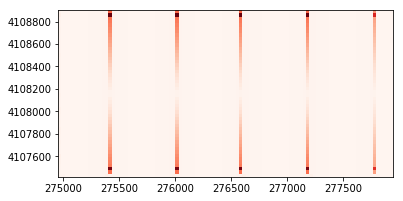

In [14]:
area.plot(cmap='Reds')